In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
#input 
kepadatan = ctrl.Antecedent(np.arange(0, 101, 1), 'kepadatan')
waktu = ctrl.Antecedent(np.arange(0, 25, 1), 'waktu')

In [4]:
#output
durasi_lampu_hijau = ctrl.Consequent(np.arange(0, 121, 1), 'durasi_lampu_hijau')

In [5]:
kepadatan['tidak_padat'] = fuzz.trimf(kepadatan.universe, [0, 0, 30])
kepadatan['kurang_padat'] = fuzz.trimf(kepadatan.universe, [20, 30, 50])
kepadatan['cukup_padat'] = fuzz.trimf(kepadatan.universe, [40, 50, 70])
kepadatan['padat'] = fuzz.trimf(kepadatan.universe, [60, 70, 90])
kepadatan['sangat_padat'] = fuzz.trimf(kepadatan.universe, [80, 100, 100])

In [6]:
waktu['pagi'] = fuzz.trimf(waktu.universe, [0, 0, 8])
waktu['siang'] = fuzz.trimf(waktu.universe, [7, 12, 17])
waktu['malam'] = fuzz.trimf(waktu.universe, [16, 24, 24])

In [7]:
durasi_lampu_hijau['pendek'] = fuzz.trimf(durasi_lampu_hijau.universe, [0, 0, 30])
durasi_lampu_hijau['sedang'] = fuzz.trimf(durasi_lampu_hijau.universe, [20, 50, 80])
durasi_lampu_hijau['panjang'] = fuzz.trimf(durasi_lampu_hijau.universe, [60, 120, 120])

In [8]:
rule1 = ctrl.Rule(kepadatan['tidak_padat'] &
                  waktu['pagi'], durasi_lampu_hijau['sedang'])
rule2 = ctrl.Rule(kepadatan['tidak_padat'] &
                  waktu['siang'], durasi_lampu_hijau['panjang'])
rule3 = ctrl.Rule(kepadatan['tidak_padat'] &
                  waktu['malam'], durasi_lampu_hijau['pendek'])

rule4 = ctrl.Rule(kepadatan['kurang_padat'] &
                  waktu['pagi'], durasi_lampu_hijau['pendek'])
rule5 = ctrl.Rule(kepadatan['kurang_padat'] &
                  waktu['siang'], durasi_lampu_hijau['sedang'])
rule6 = ctrl.Rule(kepadatan['kurang_padat'] &
                  waktu['malam'], durasi_lampu_hijau['panjang'])

rule7 = ctrl.Rule(kepadatan['cukup_padat'] &
                  waktu['pagi'], durasi_lampu_hijau['panjang'])
rule8 = ctrl.Rule(kepadatan['cukup_padat'] &
                  waktu['siang'], durasi_lampu_hijau['sedang'])
rule9 = ctrl.Rule(kepadatan['cukup_padat'] &
                  waktu['malam'], durasi_lampu_hijau['pendek'])

rule10 = ctrl.Rule(kepadatan['sangat_padat'] &
                   waktu['pagi'], durasi_lampu_hijau['panjang'])


In [9]:
control_lampu = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
simulasi_lampu = ctrl.ControlSystemSimulation(control_lampu)

Input  = Kepadatan: 100, Waktu: 6
Output = Durasi Lampu Hijau: 94 detik


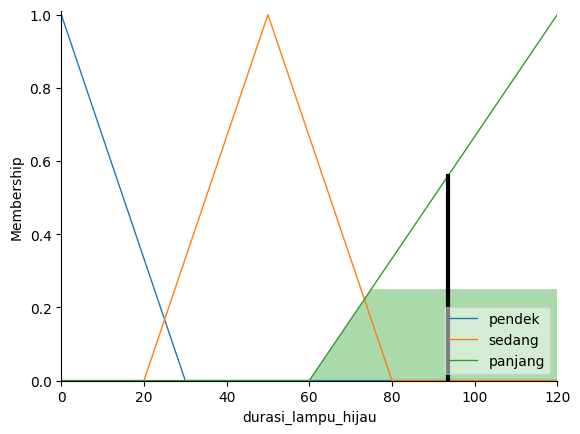

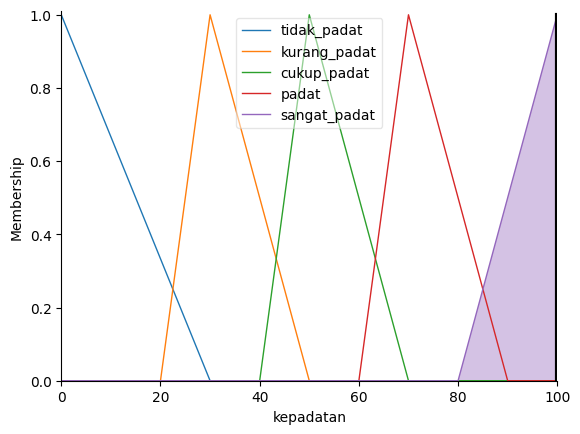

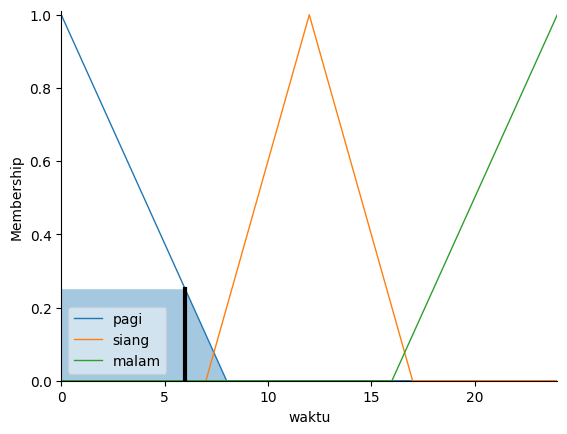

In [37]:
rand_kepadatan = np.random.randint(0,101)
rand_waktu = (np.random.randint(0,25))

simulasi_lampu.input['kepadatan'] = rand_kepadatan

simulasi_lampu.input['waktu'] = rand_waktu


simulasi_lampu.compute()


# Output
print(f"Input  = Kepadatan: {rand_kepadatan}, Waktu: {rand_waktu}")
print(f"Output = Durasi Lampu Hijau: {simulasi_lampu.output['durasi_lampu_hijau']:.0f} detik")

durasi_lampu_hijau.view(sim=simulasi_lampu)
kepadatan.view(sim=simulasi_lampu)
waktu.view(sim=simulasi_lampu)